### Importing Python libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Loading the Fashion MNIST Dataset 

In [2]:
fashion_mnist_dataset = keras.datasets.fashion_mnist
(X_train_full, y_train_full) , (X_test, y_test) = fashion_mnist_dataset.load_data()

print("Shape: ", X_train_full.shape,"Type: ", X_train_full.dtype)
print("Shape: ",y_train_full.shape,"Type: ", y_train_full.dtype)
print("Shape: ",X_test.shape,"Type: ", X_test.dtype)
print("Shape: ",y_test.shape,"Type: ", y_test.dtype)

Shape:  (60000, 28, 28) Type:  uint8
Shape:  (60000,) Type:  uint8
Shape:  (10000, 28, 28) Type:  uint8
Shape:  (10000,) Type:  uint8


### Splitting Data into validation, training and testing sets

In [3]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [4]:
print (y_train) #number of classes 
#print (X_train[0])

[4 0 7 ... 3 0 5]


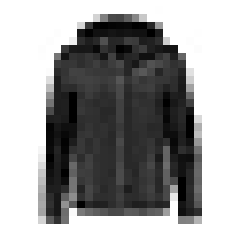

In [5]:
plt.imshow(X_train[0], cmap = "binary")
plt.axis("off")
plt.show()

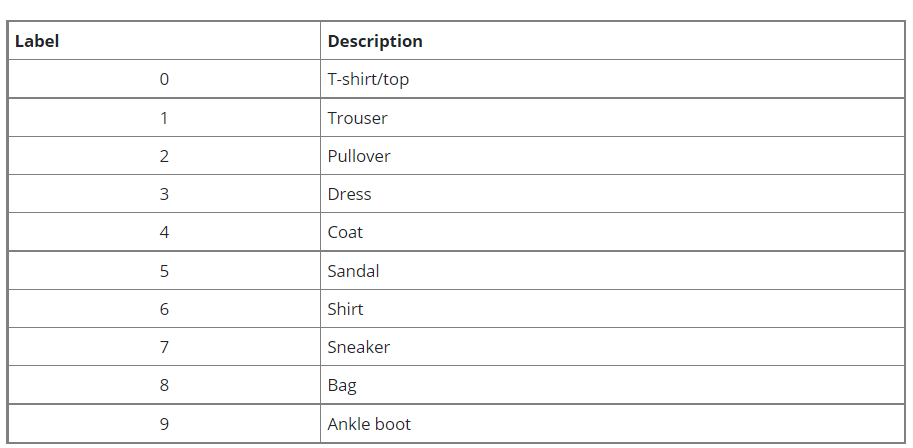

In [6]:
#as per the given data
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

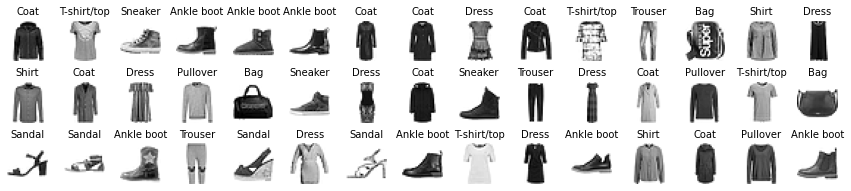

In [7]:
#first 45 products in X_train
n_rows = 3
n_cols = 15
plt.figure(figsize=(n_cols * 1.0, n_rows * 1.0))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating a model Using Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) # reshaping it into 1D array
model.add(keras.layers.Dense(300, activation = "relu")) #hidden layer with 300 neurons with relu activation
model.add(keras.layers.Dense(100, activation = "relu")) #hidden layer with 100 neurons with relu activation
model.add(keras.layers.Dense(10, activation = "softmax")) #output layer with 10 clasess with softmax activation


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
hidden1 = model.layers[1]
print(hidden1.name)
weights,biases = hidden1.get_weights()
print(weights.shape, biases.shape)
print (weights)
print(biases)

dense
(784, 300) (300,)
[[ 0.06210615  0.06214838 -0.00382992 ... -0.07439651  0.06550466
   0.02221043]
 [-0.00148106 -0.02367849 -0.02383274 ... -0.01843836  0.04048106
   0.04369807]
 [ 0.00306416 -0.04097866 -0.00052263 ... -0.05336362  0.03077335
   0.06247394]
 ...
 [-0.04922127 -0.01877603  0.01511352 ...  0.01654197  0.0249536
   0.05844256]
 [ 0.00885654 -0.05204196 -0.02726313 ... -0.0191966   0.06231739
   0.04786773]
 [ 0.04460751  0.05167112 -0.04326296 ...  0.04597943  0.02502865
  -0.02016159]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [11]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD"
)

In [12]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid,  y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 732us/step - loss: 0.7199 - accuracy: 0.7667 - val_loss: 0.5138 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 1s 717us/step - loss: 0.4853 - accuracy: 0.8325 - val_loss: 0.4446 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 1s 699us/step - loss: 0.4405 - accuracy: 0.8469 - val_loss: 0.4228 - val_accuracy: 0.8530
Epoch 4/30
1719/1719 [==============================] - 1s 703us/step - loss: 0.4160 - accuracy: 0.8530 - val_loss: 0.4375 - val_accuracy: 0.8456
Epoch 5/30
1719/1719 [==============================] - 1s 673us/step - loss: 0.3950 - accuracy: 0.8619 - val_loss: 0.3798 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 1s 672us/step - loss: 0.3793 - accuracy: 0.8673 - val_loss: 0.3874 - val_accuracy: 0.8678
Epoch 7/30
1719/1719 [==============================] - 1s 672us/step - loss: 0.3669 - accuracy: 0.8713 - val_loss: 0.3644 -

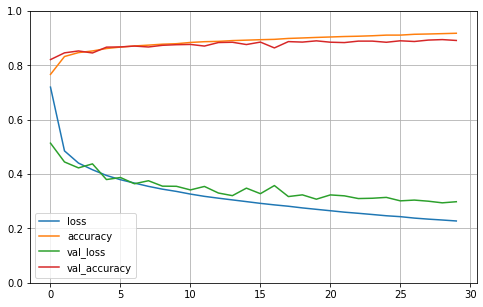

In [14]:
pd.DataFrame(history.history).plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 636us/step - loss: 60.8961 - accuracy: 0.8479


[60.896080017089844, 0.8478999733924866]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print (y_proba.round(2))

y_pred = model.predict_classes(X_new)
y_pred



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([9, 2, 1], dtype=int64)

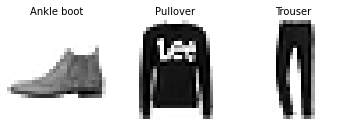

In [34]:
for col in range(X_new.shape[0]):
    plt.subplot(1, X_new.shape[0], col + 1) #rows, columns and index
    plt.imshow(X_new[col], cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[col]], fontsize=10)
plt.subplots_adjust(wspace=0.2, hspace=0.5)